## Missing Values

In [1]:
import pandas as pd
data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   PID              1460 non-null   int64  
 2   MS SubClass      1460 non-null   int64  
 3   MS Zoning        1460 non-null   object 
 4   Lot Frontage     1211 non-null   float64
 5   Lot Area         1460 non-null   int64  
 6   Street           1460 non-null   object 
 7   Alley            109 non-null    object 
 8   Lot Shape        1460 non-null   object 
 9   Land Contour     1460 non-null   object 
 10  Utilities        1460 non-null   object 
 11  Lot Config       1460 non-null   object 
 12  Land Slope       1460 non-null   object 
 13  Neighborhood     1460 non-null   object 
 14  Condition 1      1460 non-null   object 
 15  Condition 2      1460 non-null   object 
 16  Bldg Type        1460 non-null   object 
 17  House Style   

In [3]:
numerical_train = train.select_dtypes(exclude='object')
numerical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            1460 non-null   int64  
 1   PID              1460 non-null   int64  
 2   MS SubClass      1460 non-null   int64  
 3   Lot Frontage     1211 non-null   float64
 4   Lot Area         1460 non-null   int64  
 5   Overall Qual     1460 non-null   int64  
 6   Overall Cond     1460 non-null   int64  
 7   Year Built       1460 non-null   int64  
 8   Year Remod/Add   1460 non-null   int64  
 9   Mas Vnr Area     1449 non-null   float64
 10  BsmtFin SF 1     1459 non-null   float64
 11  BsmtFin SF 2     1459 non-null   float64
 12  Bsmt Unf SF      1459 non-null   float64
 13  Total Bsmt SF    1459 non-null   float64
 14  1st Flr SF       1460 non-null   int64  
 15  2nd Flr SF       1460 non-null   int64  
 16  Low Qual Fin SF  1460 non-null   int64  
 17  Gr Liv Area   

In [8]:
cols_to_drop = ['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold']

numerical_train.drop(cols_to_drop, axis=1, inplace=True)

c:\users\test\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
null_series = numerical_train.isnull().sum()

In [14]:
full_cols_series = null_series[null_series == 0]

## Correlating Feature Columns With Target Column

In [16]:
train_subset = train[full_cols_series.index]

In [24]:
sorted_corrs = train_subset.corr()['SalePrice'].abs().sort_values(ascending=False)
sorted_corrs

SalePrice          1.000000
Overall Qual       0.804562
Gr Liv Area        0.698990
Garage Cars        0.663485
Garage Area        0.662397
1st Flr SF         0.657119
Full Bath          0.518194
Fireplaces         0.485683
TotRms AbvGrd      0.483701
Open Porch SF      0.344383
Wood Deck SF       0.319104
Lot Area           0.274730
Half Bath          0.272870
2nd Flr SF         0.202352
Enclosed Porch     0.165873
Pool Area          0.145474
Kitchen AbvGr      0.130843
Bedroom AbvGr      0.106941
Screen Porch       0.100121
Overall Cond       0.099395
MS SubClass        0.088504
Order              0.068181
Low Qual Fin SF    0.060352
3Ssn Porch         0.038699
Misc Val           0.009903
Name: SalePrice, dtype: float64

## Correlation Matrix Heatmap

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
strong_corrs = sorted_corrs[sorted_corrs > 0.3]

In [38]:
strong_corrs

SalePrice        1.000000
Overall Qual     0.804562
Gr Liv Area      0.698990
Garage Cars      0.663485
Garage Area      0.662397
1st Flr SF       0.657119
Full Bath        0.518194
Fireplaces       0.485683
TotRms AbvGrd    0.483701
Open Porch SF    0.344383
Wood Deck SF     0.319104
Name: SalePrice, dtype: float64

In [37]:
corrmat = train_subset[strong_corrs.index].corr()

In [35]:
corrmat

,SalePrice,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,1st Flr SF,Full Bath,Fireplaces,TotRms AbvGrd,Open Porch SF,Wood Deck SF
SalePrice,1.000000,0.804562,0.698990,0.663485,0.662397,0.657119,0.518194,0.485683,0.483701,0.344383,0.319104
Overall Qual,0.804562,1.000000,0.562903,0.609088,0.581106,0.490056,0.505102,0.386205,0.360203,0.319954,0.260258
Gr Liv Area,0.698990,0.562903,1.000000,0.498711,0.465366,0.515404,0.625981,0.460746,0.807301,0.321806,0.238396
Garage Cars,0.663485,0.609088,0.498711,1.000000,0.890509,0.441351,0.468295,0.342560,0.343422,0.190875,0.227391
Garage Area,0.662397,0.581106,0.465366,0.890509,1.000000,0.477281,0.402743,0.302616,0.295586,0.218563,0.219300
1st Flr SF,0.657119,0.490056,0.515404,0.441351,0.477281,1.000000,0.341061,0.429662,0.360595,0.191891,0.206013
Full Bath,0.518194,0.505102,0.625981,0.468295,0.402743,0.341061,1.000000,0.245036,0.517731,0.255968,0.180358
Fireplaces,0.485683,0.386205,0.460746,0.342560,0.302616,0.429662,0.245036,1.000000,0.307189,0.148664,0.209153
TotRms AbvGrd,0.483701,0.360203,0.807301,0.343422,0.295586,0.360595,0.517731,0.307189,1.000000,0.222774,0.148162
Open Porch SF,0.344383,0.319954,0.321806,0.190875,0.218563,0.191891,0.255968,0.148664,0.222774,1.000000,0.039738


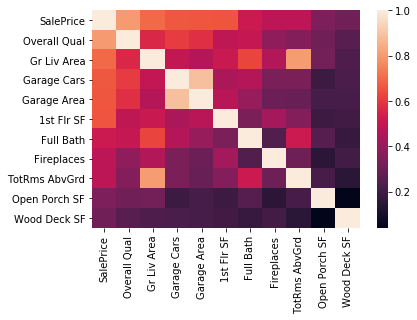

In [39]:
sns.heatmap(corrmat)

## Train And Test Model

Based on the correlation matrix heatmap, we can tell that the following pairs of columns are strongly correlated:

* `Gr Liv Area` and `TotRms AbvGrd`
* `Garage Area` and `Garage Cars`

Gr Liv Area: Above grade (ground) living area square feet

TotRms Abv Grd: Total rooms above grade (does not include bathrooms)

Garage Cars: Size of garage in car capacity

Garage Area: Size of garage in square feet

We can tell that each pair of columns reflects very similar information. Because `Gr Liv Area` and `Garage Area` are continuous variables that capture more nuance, let's drop the `TotRms AbvGrd` and `Garage Cars`.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
features = final_corr_cols.drop(['SalePrice']).index
target = 'SalePrice'

In [47]:
clean_test = test[final_corr_cols.index].dropna()

In [50]:
lr = LinearRegression()
lr.fit(train_subset[features], train_subset[target])


LinearRegression()

In [52]:
train_preds = lr.predict(train_subset[features])

train_rmse = mean_squared_error(train_subset[target], train_preds)**0.5

In [54]:
test_preds = lr.predict(clean_test[features])
test_rmse = mean_squared_error(clean_test[target], test_preds)**0.5

In [57]:
train_rmse 

34173.97629185852

In [59]:
test_rmse

41032.02612019742

## Removing Low Variance Features

In [68]:
unit_train = (train_subset[features] - train_subset[features].min()) / (train_subset[features].max() - train_subset[features].min())

In [69]:
unit_train.describe()

,Overall Qual,Gr Liv Area,Garage Area,1st Flr SF,Full Bath,Fireplaces,Open Porch SF,Wood Deck SF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.567580,0.351245,0.318119,0.335449,0.391438,0.198402,0.084983,0.138207
std,0.156512,0.151916,0.142642,0.160668,0.136459,0.215846,0.118058,0.181836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.444444,0.238091,0.224798,0.211704,0.250000,0.000000,0.000000,0.000000
50%,0.555556,0.339274,0.322581,0.307229,0.500000,0.333333,0.047532,0.000000
75%,0.666667,0.429439,0.387097,0.434703,0.500000,0.333333,0.127971,0.251497
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
unit_train.var().sort_values()

Open Porch SF    0.013938
Full Bath        0.018621
Garage Area      0.020347
Gr Liv Area      0.023078
Overall Qual     0.024496
1st Flr SF       0.025814
Wood Deck SF     0.033064
Fireplaces       0.046589
dtype: float64

In [ ]:
features = features.drop('Open Porch SF')

## Final Model

In [78]:
lr = LinearRegression()
lr.fit(train_subset[features], train_subset[target])

LinearRegression()

In [79]:
train_preds_2 = lr.predict(train_subset[features])
train_rmse_2 = mean_squared_error(train_subset[target], train_preds_2)**0.5

In [80]:
test_preds_2 = lr.predict(clean_test[features])
test_rmse_2 = mean_squared_error(clean_test[target], test_preds_2)**0.5

In [81]:
train_rmse_2

34372.69670778396

In [82]:
test_rmse_2

40591.427024377255